# Quiz 4

## Estudio de caso: ShopEase Inc.
ShopEase Inc. es una empresa minorista en línea que ha estado en funcionamiento durante los últimos 5 años. La gerencia se centra en dos objetivos clave:
- Prever las ventas futuras para optimizar el inventario y las estrategias de marketing.
- Entender cómo la satisfacción del cliente afecta el LTV.

Para lograr estos objetivos, ShopEase ha proporcionado dos conjuntos de datos:
- ecommerce_sales_data.csv: Datos de ventas mensuales de los últimos 5 años.
- customer_satisfaction_data.csv: Indicadores de satisfacción del cliente de una muestra de 500 clientes.

La gerencia quiere que los ayude a:
- Prever las ventas para los próximos 12 meses.
- Crear un modelo de ecuación estructural (SEM) para comprender cómo la satisfacción del cliente se ve influenciada por el tiempo de respuesta, la calidad del producto y la probabilidad de recomendación, y cómo estos factores afectan los ingresos de la empresa.

### Pregunta 1: Pronóstico de Ventas para ShopEase Inc. 

Objetivo: ShopEase quiere saber cuántas ventas puede esperar en los próximos 12 meses para planificar su inventario y campañas de marketing.

Instrucciones:
- Utiliza el archivo ecommerce_sales_data.csv que contiene las ventas mensuales de los últimos 5 años.
- Crea un modelo de series temporales usando la librería auto_ts para predecir las ventas mensuales durante los próximos 12 meses.
- Visualiza las predicciones en un gráfico junto con los datos históricos.
- Explica tus conclusiones sobre el comportamiento esperado de las ventas en el próximo año.

### Pregunta 2: Modelado de Ecuaciones Estructurales (SEM)
Objetivo: ShopEase quiere entender mejor cómo los diferentes factores de satisfacción del cliente (tiempo de respuesta, calidad del producto y probabilidad de recomendación) afectan el valor total esperado de vida de un cliente (LTV).

Instrucciones:
- Utiliza el archivo customer_satisfaction_data.csv que contiene los indicadores de satisfacción del cliente.
- Define las siguientes relaciones en un modelo SEM:
    - Confianza del cliente como variable latente, medida por el tiempo de respuesta, calidad del producto, y probabilidad de recomendación.
- Ajusta el modelo y explica los coeficientes de las relaciones entre las variables.
- Proporciona conclusiones sobre larelación que tiene la satisfacción del cliente con el valor de vida del cliente en ShopEase.

Pregunta 1

In [3]:
pip install pandas==1.5.3

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from auto_ts import auto_timeseries
import numpy as np
from semopy import Model, Optimizer
from prophet import Prophet

from semopy import Model, Optimizer, semplot


In [7]:
df = pd.read_csv('ecommerce_sales_data.csv', parse_dates=['Fecha'])
df.set_index('Fecha', inplace=True)
df.head()

,Ventas
Fecha,
2019-10-31 11:48:50.173779,3929.298727
2019-11-30 11:48:50.173779,4250.388935
2019-12-31 11:48:50.173779,5295.721284
2020-01-31 11:48:50.173779,5678.582934
2020-02-29 11:48:50.173779,5839.616780


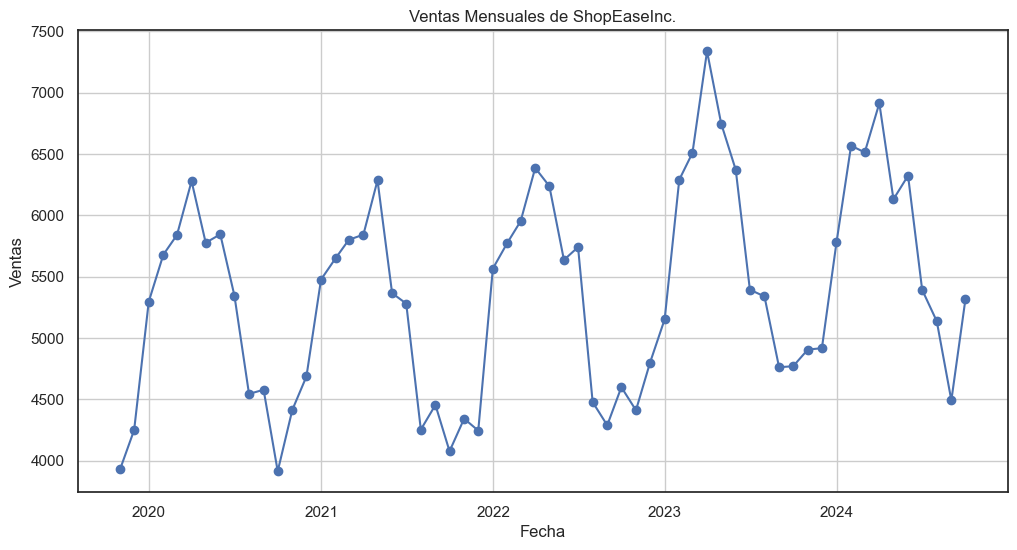

In [36]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Ventas'], marker='o')
plt.title('Ventas Mensuales de ShopEaseInc.')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

In [28]:
model = auto_timeseries(
    score_type='rmse',       # Métrica de evaluación
    time_interval='M',       # Intervalo mensual
    non_seasonal_pdq=None,   # Para modelos SARIMAX
    seasonality=False,       # Deshabilitar búsqueda de estacionalidad (se puede cambiar)
    model_type='best',       # Seleccionar el mejor modelo
    verbose=2                # Nivel de verbosidad
)    

Start of Fit.....
    Target variable given as = Ventas
Start of loading of data.....
    Inputs: ts_column = Fecha, sep = ,, target = ['Ventas']
    Using given input: pandas dataframe...
    train time series Fecha column is the index on test data...
    train data shape = (48, 1)
Alert: Could not detect strf_time_format of Fecha. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model


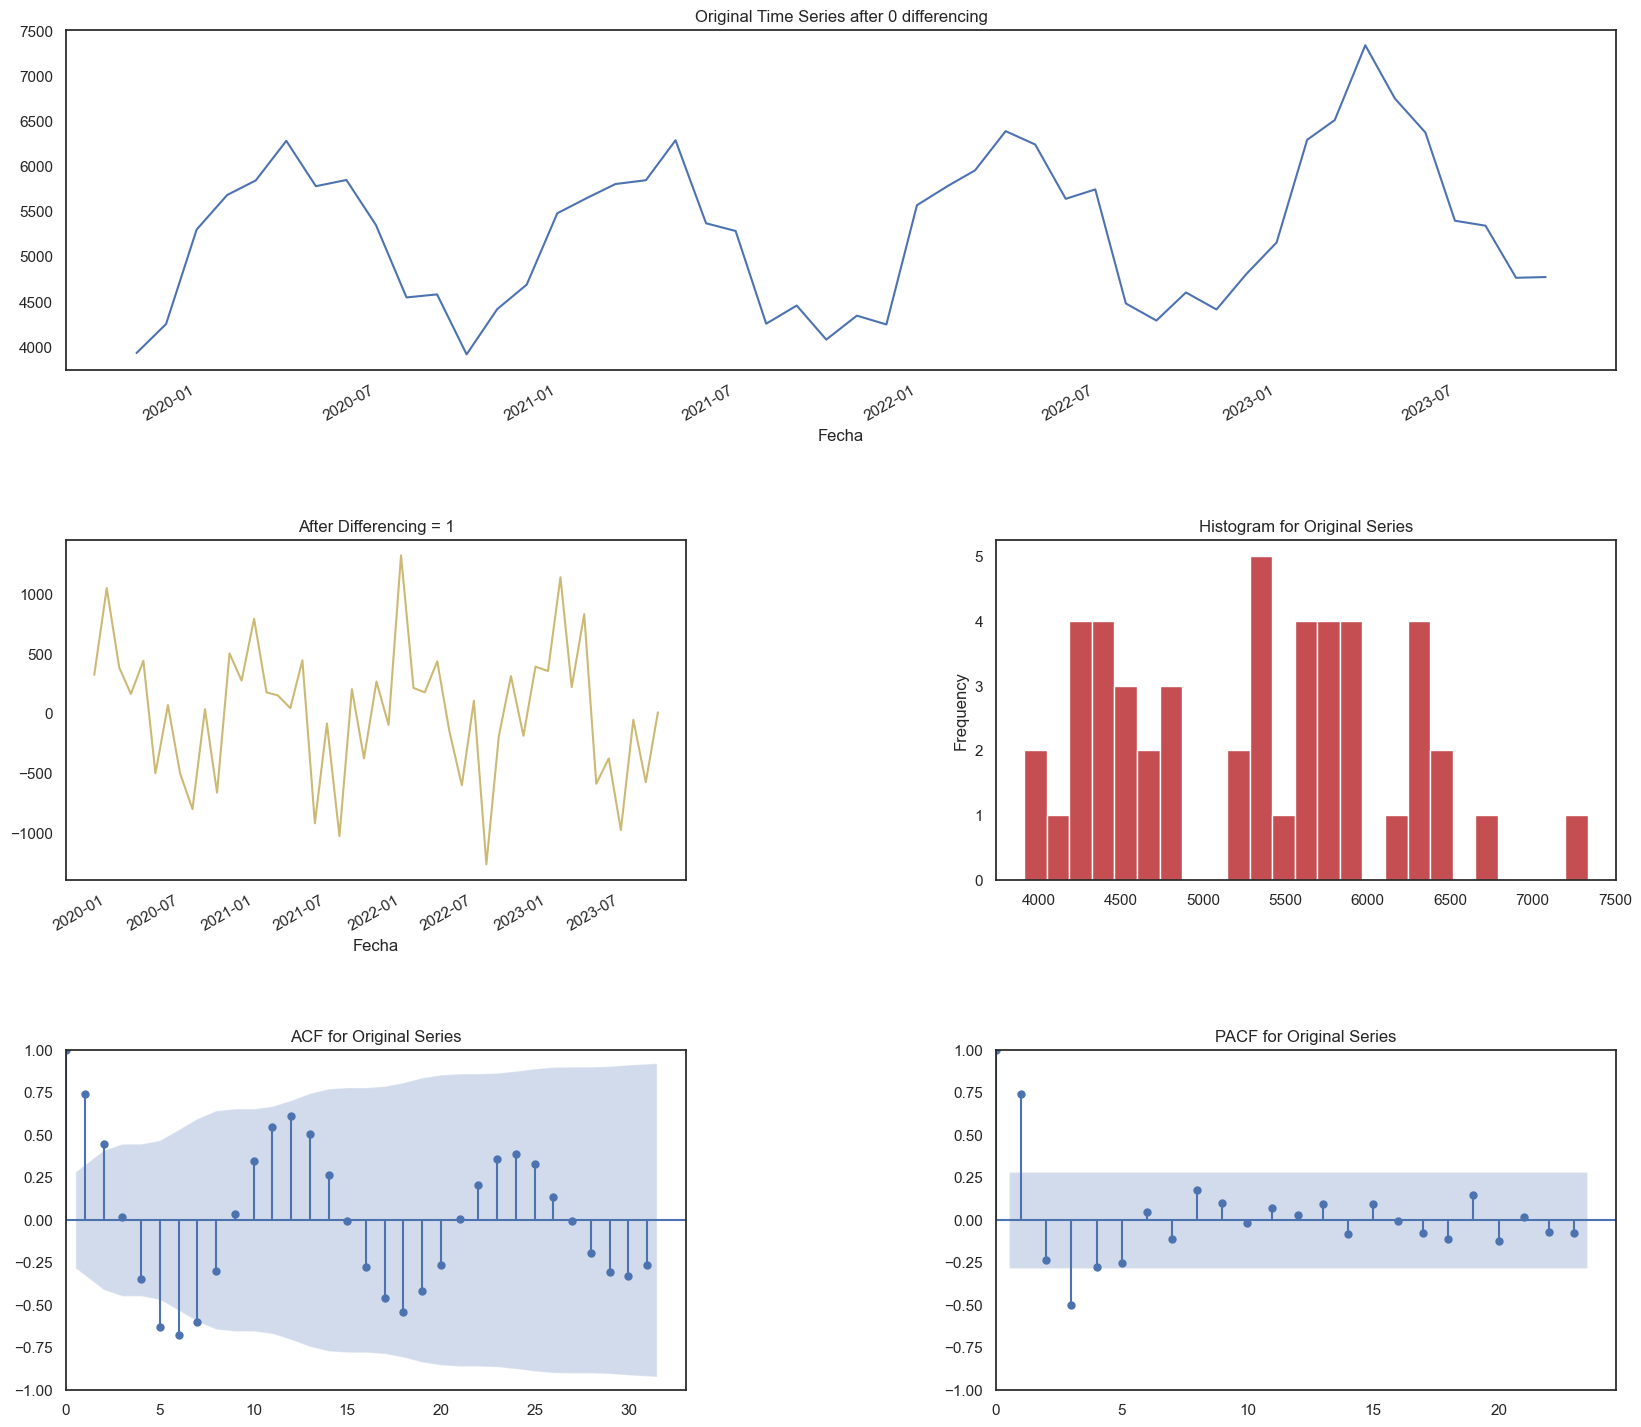

18:38:24 - cmdstanpy - INFO - Chain [1] start processing


Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(48, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 23 Test Shape: 5


18:38:24 - cmdstanpy - INFO - Chain [1] done processing
18:38:24 - cmdstanpy - INFO - Chain [1] start processing
18:38:24 - cmdstanpy - INFO - Chain [1] done processing
18:38:24 - cmdstanpy - INFO - Chain [1] start processing
18:38:24 - cmdstanpy - INFO - Chain [1] done processing
18:38:24 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 823.24
    Std Deviation of actuals = 718.07
    Normalized RMSE (as pct of std dev) = 115%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 28 Test Shape: 5
    RMSE = 548.33
    Std Deviation of actuals = 285.19
    Normalized RMSE (as pct of std dev) = 192%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 33 Test Shape: 5
    RMSE = 270.32
    Std Deviation of actuals = 174.22
    Normalized RMSE (as pct of std dev) = 155%
Cross Validation window: 3 completed

Fold Number: 4 --> Train Shape: 38 Test Shape: 5


18:38:24 - cmdstanpy - INFO - Chain [1] done processing
18:38:24 - cmdstanpy - INFO - Chain [1] start processing
18:38:24 - cmdstanpy - INFO - Chain [1] done processing
18:38:25 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 527.24
    Std Deviation of actuals = 717.74
    Normalized RMSE (as pct of std dev) = 73%
Cross Validation window: 4 completed

Fold Number: 5 --> Train Shape: 43 Test Shape: 5
    RMSE = 645.32
    Std Deviation of actuals = 586.79
    Normalized RMSE (as pct of std dev) = 110%
Cross Validation window: 5 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 501.05
    MSE (Mean Squared Error = 349178.56
    MAPE (Mean Absolute Percent Error) = 10%
    RMSE (Root Mean Squared Error) = 590.9133
    Normalized RMSE (MinMax) = 18%
    Normalized RMSE (as Std Dev of Actuals)= 65%
Time Taken = 1 seconds


18:38:25 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: False
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 23 Test Shape: 5

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=461.002, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=437.043, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=364.171, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=365.663, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=358.541, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=359.763, Time=0.02 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=359.939, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,3)(0,0,0)[0]  

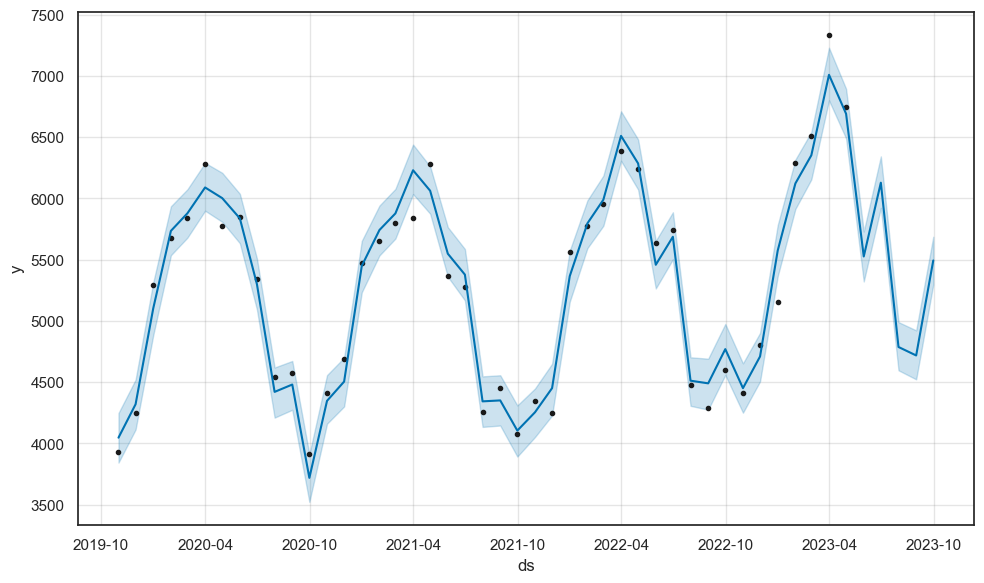

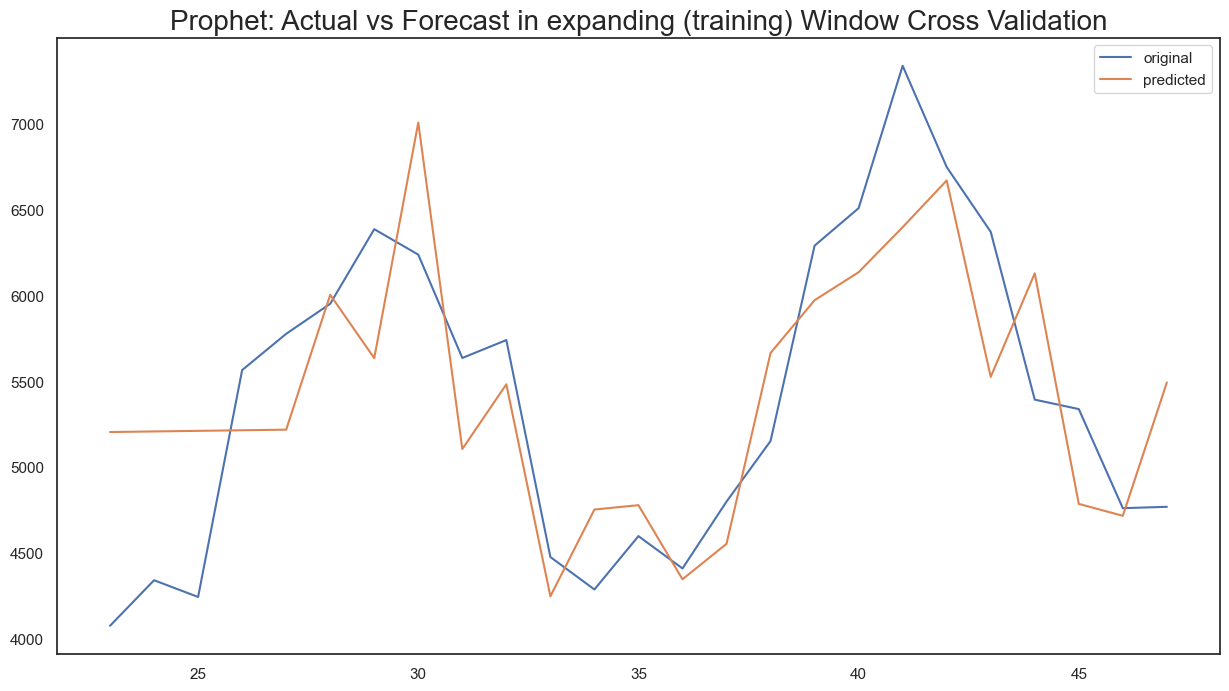

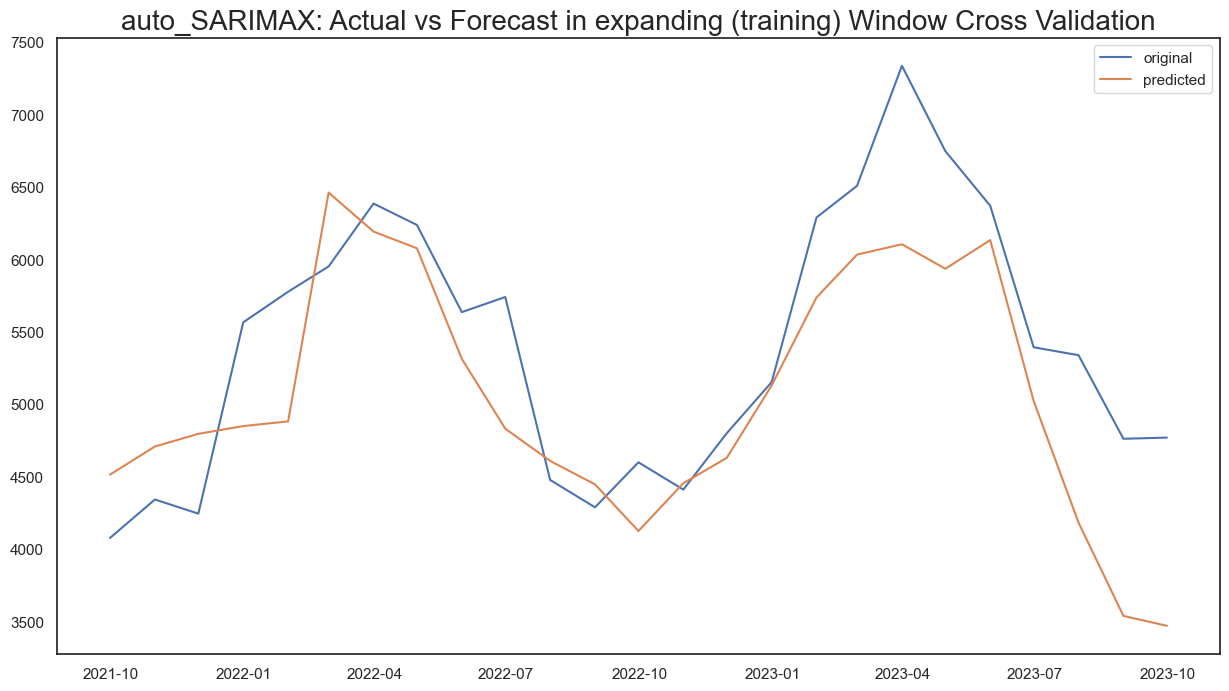

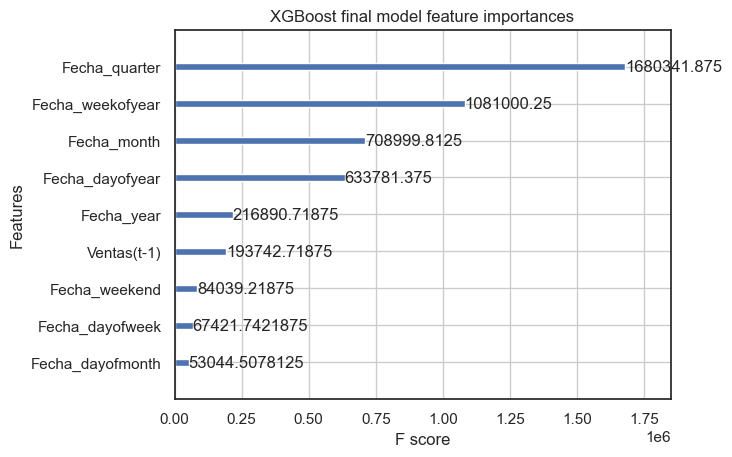

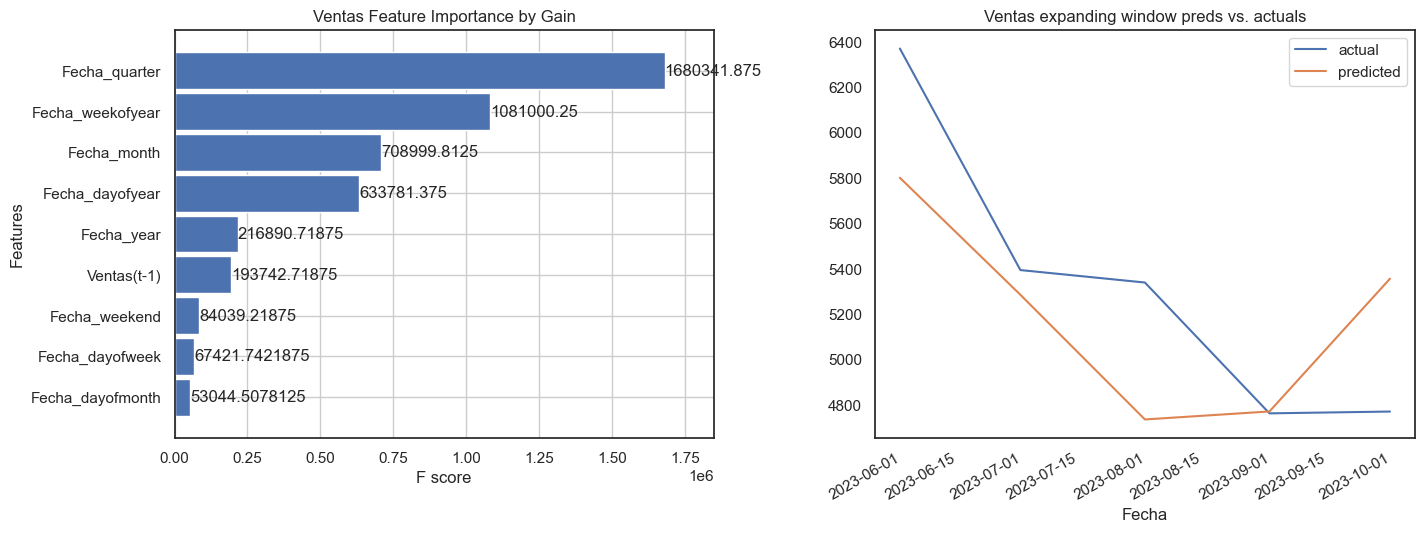

In [30]:
train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

model.fit(
    traindata=train_df,
    ts_column=train_df.index.name,
    target='Ventas'
)

In [32]:
forecast = model.predict(testdata=test_df)
forecast

Predicting using test dataframe shape = (12, 1) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for Fecha. Provide strf_time format during "setup" for better results.
ML predictions completed


,yhat,mean_se,mean_ci_lower,mean_ci_upper
Fecha,,,,
2023-10-31 11:48:50.173779,4688.353027,NaN,NaN,NaN
2023-11-30 11:48:50.173779,4749.770020,NaN,NaN,NaN
2023-12-31 11:48:50.173779,5375.533691,NaN,NaN,NaN
2024-01-31 11:48:50.173779,6217.379883,NaN,NaN,NaN
2024-02-29 11:48:50.173779,6492.637695,NaN,NaN,NaN
2024-03-31 11:48:50.173779,6645.411621,NaN,NaN,NaN
2024-04-30 11:48:50.173779,6306.208008,NaN,NaN,NaN
2024-05-31 11:48:50.173779,6278.331543,NaN,NaN,NaN
2024-06-30 11:48:50.173779,5852.113770,NaN,NaN,NaN


Predicting using test dataframe shape = (12, 0) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for Fecha. Provide strf_time format during "setup" for better results.
    converting testdata to datetime index erroring. Please check input and try again.
ML predictions completed


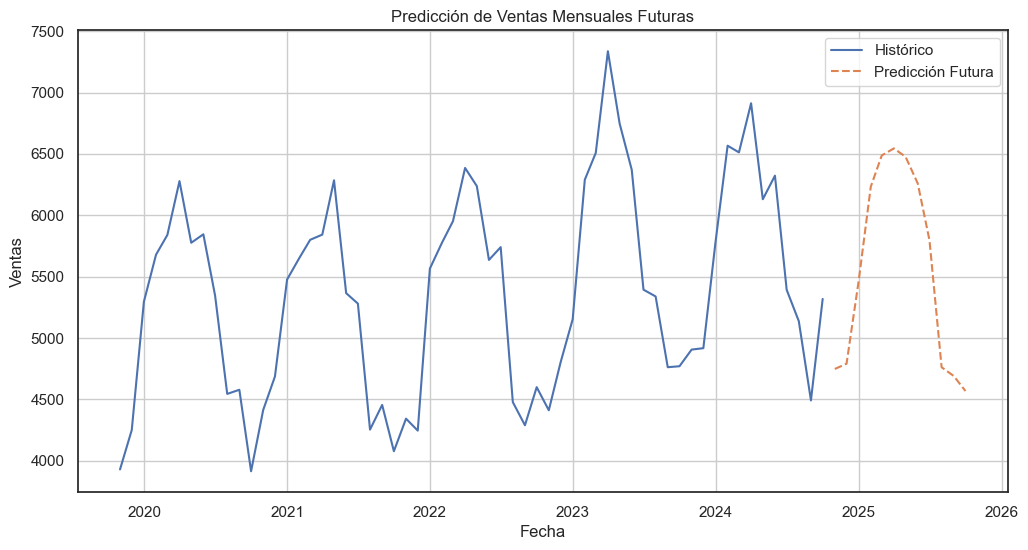

In [34]:
x

De acuerdo a la prediccion futura de los proximos 12 meses se espera una tendencia similar a los ultimos 5 años, podemos notar en la prediccion que a finales de 2024 e inicios de 2025 se espera que las ventas crezcan llegando a su punto más alto siendo un poco por encima de las 6500 ventas mensuales, despues de este pico se espera que a mediados del año del 2025 las ventas caigan de nuevo, lo recomendado para la empresa sería invertir más en inventario y marketing a finales del año e inicio del siguiente año para poder incrementar este pico de ventas y de igual manera invertir menos en marketing e inventario a mediados del año, cuando las ventas vayan bajando.

Pregunta 2

In [38]:
data = pd.read_csv('customer_satisfaction_data.csv')
data.head()

,Tiempo_Respuesta,Calidad_Producto,Probabilidad_Recomendacion,LTV
0,7.993428,9.389266,7.402641,1156.97
1,6.723471,10.000000,7.562898,1324.58
2,8.295377,5.902149,5.911942,711.72
3,10.000000,8.844454,4.330033,899.99
4,6.531693,7.024036,7.432377,941.69


In [65]:

from sklearn.preprocessing import StandardScaler

# Cargar los datos
data = pd.read_csv('customer_satisfaction_data.csv')

# Seleccionar las columnas numéricas excepto 'LTV'
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'LTV' in numeric_cols:
    numeric_cols.remove('LTV')

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Mostrar las primeras filas del DataFrame estandarizado
print(data.head())



   Tiempo_Respuesta  Calidad_Producto  Probabilidad_Recomendacion      LTV
0          0.573365          1.052019                    0.558383  1156.97
1         -0.124230          1.507515                    0.669697  1324.58
2          0.739227         -1.548738                   -0.477060   711.72
3          1.675587          0.645688                   -1.575856   899.99
4         -0.229575         -0.712013                    0.579037   941.69


In [87]:
model_desc = """
# Latent Variables
Desconfianza =~ Tiempo_Respuesta + Calidad_Producto + Probabilidad_Recomendacion
"""

In [89]:
mod = Model(model_desc)
res_opt = mod.fit(data)
estimates = mod.inspect()

# Imprimir los resultados del ajuste del modelo
print(estimates)

                         lval  op                        rval  Estimate  \
0            Tiempo_Respuesta   ~                Desconfianza  1.000000   
1            Calidad_Producto   ~                Desconfianza -0.141327   
2  Probabilidad_Recomendacion   ~                Desconfianza -1.299332   
3                Desconfianza  ~~                Desconfianza  0.543099   
4            Calidad_Producto  ~~            Calidad_Producto  0.989200   
5  Probabilidad_Recomendacion  ~~  Probabilidad_Recomendacion  0.083047   
6            Tiempo_Respuesta  ~~            Tiempo_Respuesta  0.456705   

   Std. Err    z-value   p-value  
0         -          -         -  
1   0.06332  -2.231957  0.025618  
2  0.538484  -2.412946  0.015824  
3   0.23091   2.351998  0.018673  
4  0.062722  15.771129       0.0  
5  0.378129   0.219627  0.826161  
6  0.225808   2.022531  0.043122  


In [95]:
# Cargar factores estimados (cargas factoriales)
confianza_factors = [1.0, -0.141, -0.1299] 

# Función para calcular el valor de la variable latente
def calculate_latent_values(df):
    # Calcular Confianza como la suma ponderada de Uso, Seguridad y Recomendaciones
    df['Desconfianza'] = (df['Tiempo_Respuesta'] * confianza_factors[0] +
                       df['Calidad_Producto'] * confianza_factors[1] +
                       df['Probabilidad_Recomendacion'] * confianza_factors[2])
    
    # Calcular Calidad del Servicio como la suma ponderada de Tiempo de Respuesta y Resolución de Problemas
    df['Lifetime Value'] = (df['LTV'])
                     
    
    return df[['Desconfianza', 'Lifetime Value']]

# Calcular valores latentes en el dataset
latent_values = calculate_latent_values(data)

# Mostrar los primeros valores calculados
print(latent_values.head())


   Desconfianza  Lifetime Value
0      0.352497         1156.97
1     -0.423783         1324.58
2      1.019569          711.72
3      1.789249          899.99
4     -0.204398          941.69


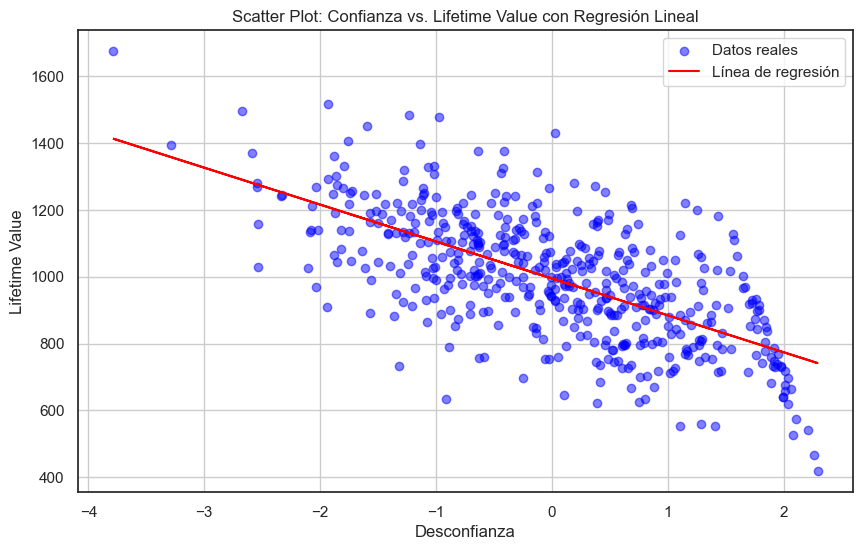

In [101]:
from sklearn.linear_model import LinearRegression
X = latent_values[['Desconfianza']]
y = latent_values['Lifetime Value']

model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


plt.figure(figsize=(10, 6))
plt.scatter(latent_values['Desconfianza'], latent_values['Lifetime Value'], color='blue', alpha=0.5, label='Datos reales')
plt.plot(latent_values['Desconfianza'], y_pred, color='red', label='Línea de regresión')
plt.title('Scatter Plot: Confianza vs. Lifetime Value con Regresión Lineal')
plt.xlabel('Desconfianza')
plt.ylabel('Lifetime Value')
plt.grid(True)
plt.legend()
plt.show()


Lo que podemos concluir de acuerdo a los coeficientes es que en realidad el model de SEM nos esta brindando la desconfianza, lo podemos interpretar como que entre mayor tiempo de respuesta existe mayor desconfianza, lo podemos ver siendo el coeficiente de este 1, en cuanto a la calidad del producto, nos dice que entre mejor calidad del producto existe menor desconfianza, esto notando que el coeficiente de calidad del producto es -0.141, por ultimo podemos ver que entre mayor probabilidad de recomendacion, existe menor desconfianza ya que su coeficiente es -0.1299, comparando con el lifetime value podemos decir que entre menor desconfianza el lifetime value aumenta y mayor desconfianza entonces el lifetime value disminuye, como podemos notar en la grafica.